<a href="https://colab.research.google.com/github/junior1835/MVP/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estudo de caso sobre predição de notas de alunos de uma escola

Através do dataset contendo dados inerentes a duas escolas e variáveis categóricas e numéricas, utilizou-se o modelo para realizar algumas modelagens e, também, realizar a predição da média G3 através dos parametros fornecidos

Primeiras linhas do dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Informações gerais sobre o dataset:
<class 'pandas.core.fr

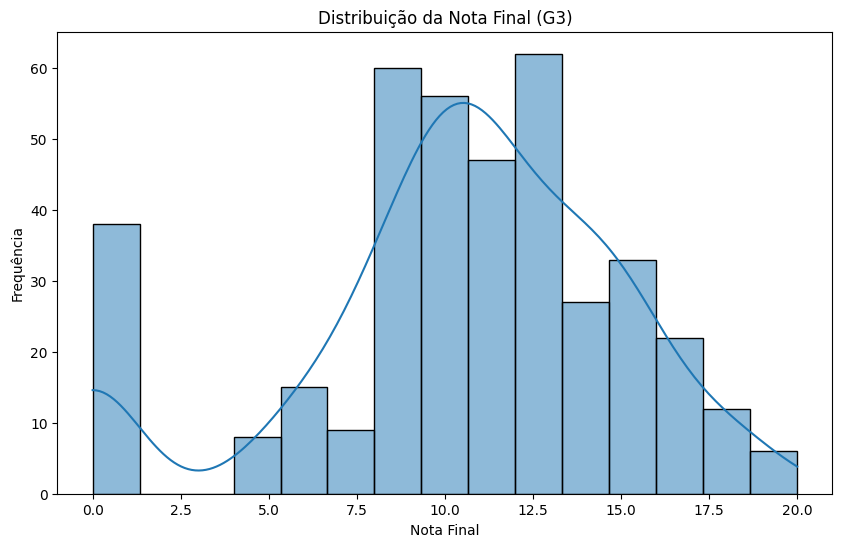

In [19]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings('ignore')

# Carregar o novo dataset
url = "https://raw.githubusercontent.com/junior1835/MVP/refs/heads/main/student-mat.csv"
df = pd.read_csv(url, delimiter=';')  # O separador do dataset é ";"

# Visualizando as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(df.head())

# Informações sobre o dataset
print("\nInformações gerais sobre o dataset:")
print(df.info())

# Estatísticas descritivas do dataset
print("\nEstatísticas descritivas do dataset:")
print(df.describe())

# Verificando valores ausentes
print("\nVerificação de valores ausentes:")
print(df.isnull().sum())

# Visualização inicial
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], kde=True, bins=15)  # Substitua 'G3' por outra variável, se necessário
plt.title("Distribuição da Nota Final (G3)")
plt.xlabel("Nota Final")
plt.ylabel("Frequência")
plt.show()




## Modelagem e Inferência

LR: 0.889214 (0.051214)
KNN: 0.901411 (0.045048)
CART: 0.898286 (0.058881)
NB: 0.837802 (0.091360)
SVM: 0.927016 (0.025170)
Bagging: 0.926915 (0.040499)
RF: 0.927016 (0.042790)
ET: 0.844153 (0.082519)
Ada: 0.936895 (0.039377)
GB: 0.926714 (0.038629)
Voting: 0.911190 (0.034494)


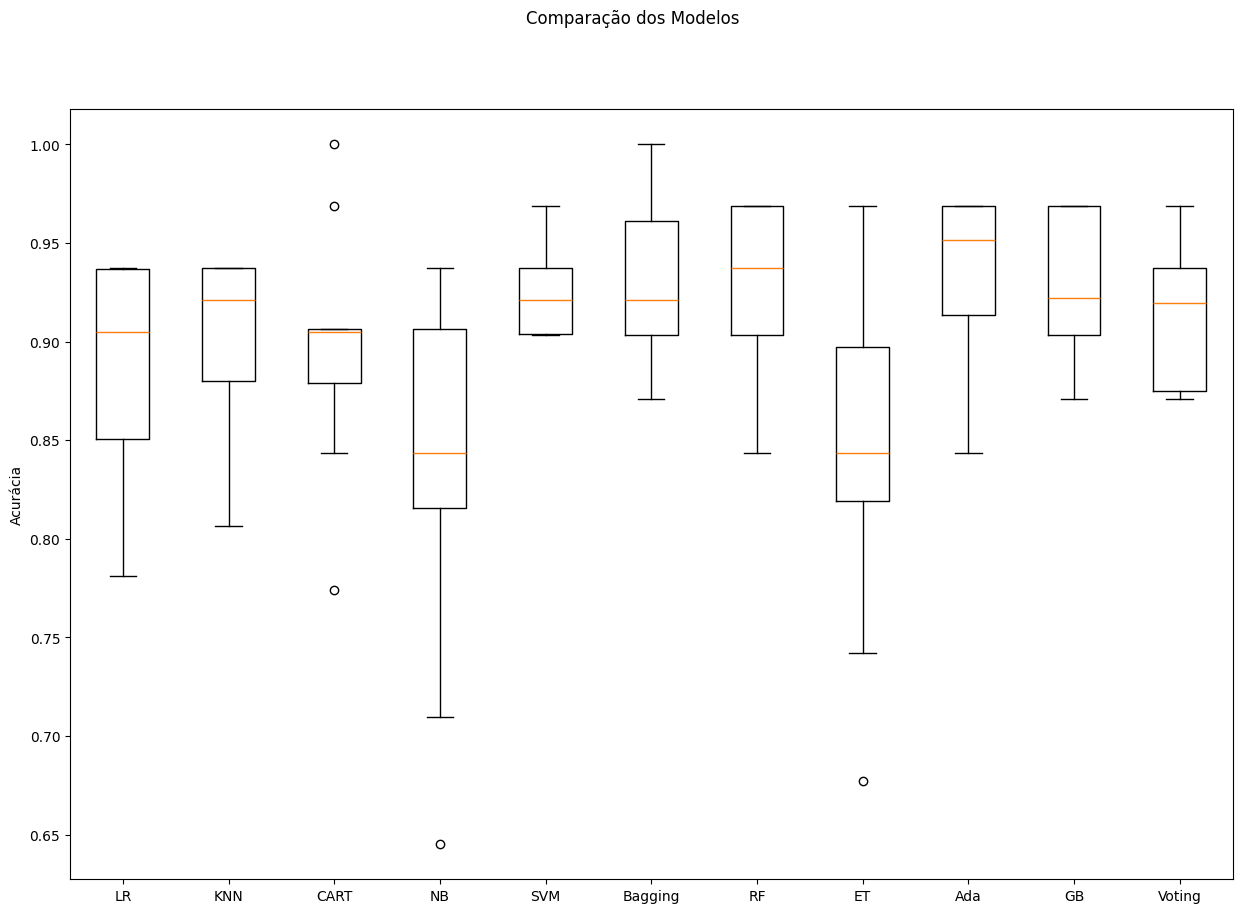

In [20]:
# Criar uma variável binária para classificação
df["G3_above_10"] = (df["G3"] > 10).astype(int)

# Converter variáveis categóricas em numéricas
data = pd.get_dummies(df, drop_first=True)

# Selecionar features e target
X = data.drop(columns=["G3", "G3_above_10"])
y = data["G3_above_10"]

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Configurações para os modelos
np.random.seed(7)
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
scoring = "accuracy"

# Lista para armazenar os modelos
models = []

# Criando os modelos e adicionando-os à lista
models.append(("LR", LogisticRegression(max_iter=200)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

# Parâmetros do BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(("logistic", model1))
model2 = DecisionTreeClassifier()
bases.append(("cart", model2))
model3 = SVC()
bases.append(("svm", model3))

# Criando os ensembles e adicionando-os à lista de modelos
models.append(("Bagging", BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(("RF", RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(("ET", ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(("Ada", AdaBoostClassifier(n_estimators=num_trees)))
models.append(("GB", GradientBoostingClassifier(n_estimators=num_trees)))
models.append(("Voting", VotingClassifier(estimators=bases, voting="hard")))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Comparação dos Modelos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel("Acurácia")
plt.show()


## Criação e Avaliação de Modelos: Dados Padronizados e Normalizados



LR-orig: 0.889 (0.051)
KNN-orig: 0.901 (0.045)
CART-orig: 0.898 (0.059)
NB-orig: 0.838 (0.091)
SVM-orig: 0.927 (0.025)
Bag-orig: 0.927 (0.040)
RF-orig: 0.927 (0.043)
ET-orig: 0.844 (0.083)
Ada-orig: 0.937 (0.039)
GB-orig: 0.927 (0.039)
Vot-orig: 0.911 (0.034)
LR-padr: 0.880 (0.053)
KNN-padr: 0.721 (0.085)
CART-padr: 0.889 (0.052)
NB-padr: 0.838 (0.091)
SVM-padr: 0.873 (0.067)
Bag-padr: 0.924 (0.043)
RF-padr: 0.921 (0.039)
ET-padr: 0.857 (0.086)
Ada-padr: 0.937 (0.039)
GB-padr: 0.924 (0.036)
Vot-padr: 0.895 (0.036)
LR-norm: 0.873 (0.075)
KNN-norm: 0.604 (0.104)
CART-norm: 0.886 (0.048)
NB-norm: 0.838 (0.091)
SVM-norm: 0.838 (0.090)
Bag-norm: 0.921 (0.046)
RF-norm: 0.924 (0.052)
ET-norm: 0.844 (0.073)
Ada-norm: 0.937 (0.039)
GB-norm: 0.927 (0.039)
Vot-norm: 0.889 (0.060)


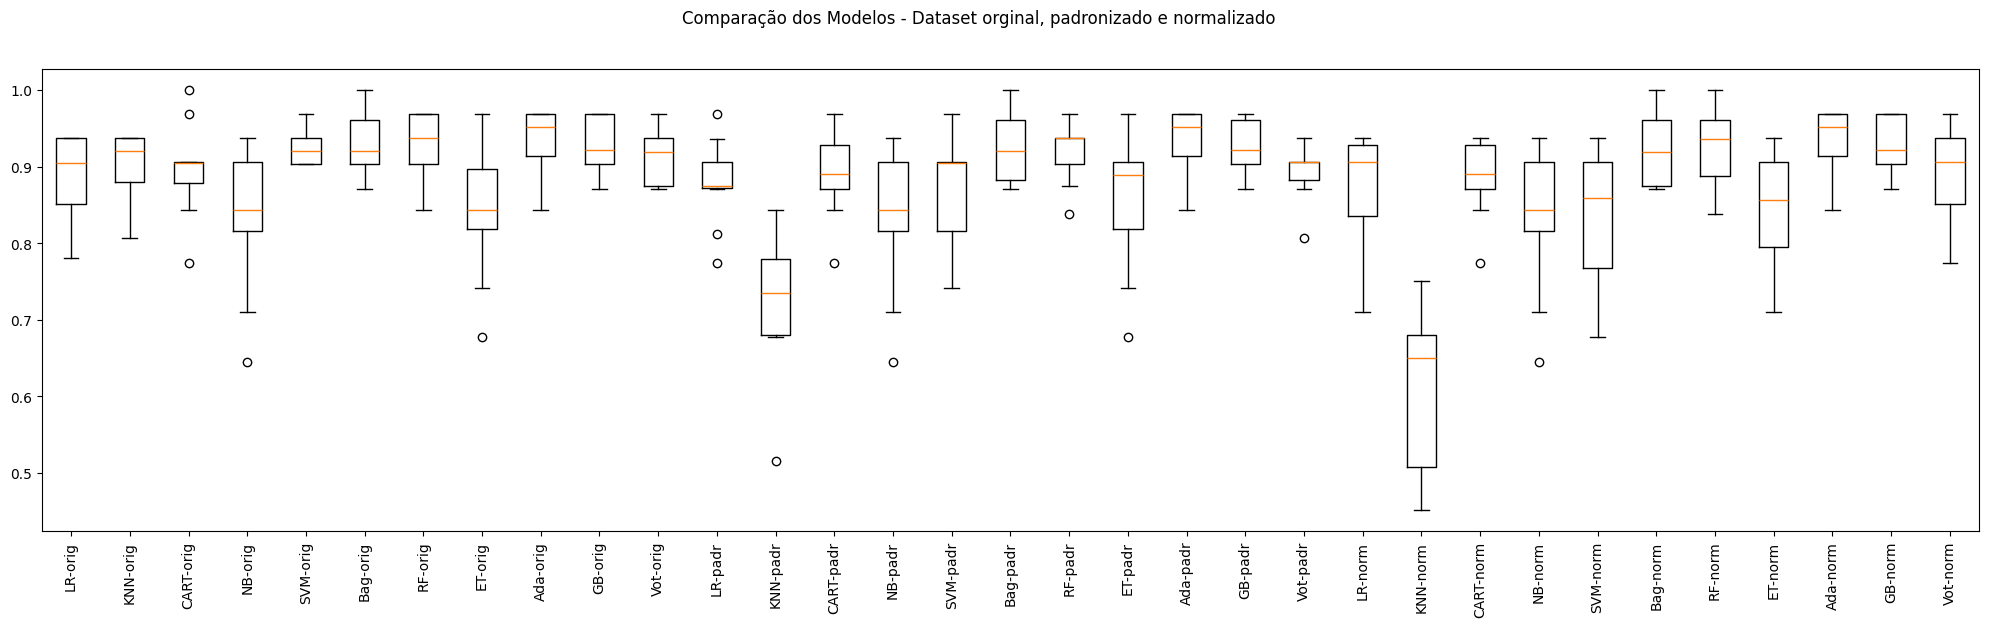

In [21]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## Otimização dos Hiperparâmetros

In [22]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.933165 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-padr - Melhor: 0.819052 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
Sem tratamento de missings: knn-norm - Melhor: 0.743044 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}


## Finalização do Modelo

In [23]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9367088607594937


In [36]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

## Simulando a aplicação do modelo em dados não vistos

In [38]:
# Novos dados - não sabemos a classe!
data = {'school': ['MS'],
        'sex': ['F'],
        'age': [18],
        'address': ['U'],
        'famsize': ['LE3'],
        'Pstatus': ['T'],
        'Medu': [4],
        'Fedu': [4],
        'Mjob': ['at_home'],
        'Fjob': ['teacher'],
        'reason': ['course'],
        'guardian': ['father'],
        'traveltime': [2],
        'studytime': [2],
        'failures': [0],
        'schoolsup': ['yes'],
        'famsup': ['no'],
        'paid': ['no'],
        'activities': ['no'],
        'nursery': ['yes'],
        'higher': ['yes'],
        'internet': ['no'],
        'romantic': ['no'],
        'famrel': [4],
        'freetime': [3],
        'goout': [4],
        'Dalc': [1],
        'Walc': [1],
        'health': [1],
        'absences': [4],
        'G1': [2],
        'G2': [4],
        'G3': [10]
        }

atributos = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
entrada = pd.DataFrame(data, columns=atributos)

#Converter valores categóricos com pandas get_dumies
entrada = pd.get_dummies(entrada, drop_first=True)
entrada = entrada.reindex(columns=X_train.columns, fill_value=0)
array_entrada = entrada.values

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(array_entrada)
print(rescaledEntradaX)

[[ 1.02304645  1.14385567  1.36037064  0.79225076 -0.04228585 -0.44994364
   0.06219406 -0.2360102   0.8014793  -0.54069866 -1.00378921 -1.83964882
  -0.21379577 -2.68744685 -1.78716749 -0.3630498  -0.94817639 -1.86778916
  -0.63694109 -2.9383918  -0.3068922  -0.74506249 -0.59391896 -0.4148576
  -0.21850711 -1.10412912 -0.62517603 -0.28148707 -0.61734827 -0.31666789
  -0.60172167 -1.49589603 -0.29690785 -0.38504002 -1.25765629 -0.91967081
  -1.01788137 -1.96889391 -4.33012702 -2.23267743 -0.70844982]]


In [39]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0]
